# Compare_with_Liu19

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt

In [3]:
sc.set_figure_params(frameon=False)

In [4]:
filename = '../data/liu19/nature25179-s4.xlsx'
exl = pd.ExcelFile(filename)
exl.sheet_names

['K562_L1-G418_second_screen',
 'HeLa-L1-G418_second_screen',
 'K562_(opt)-L1-G418R']

In [5]:
k562_wg = pd.read_excel(filename, sheet_name='K562_L1-G418_second_screen')

In [6]:
hela_wg = pd.read_excel(filename, sheet_name='HeLa-L1-G418_second_screen')

In [7]:
k562_wg.head()

,#GeneID,Symbol,GeneInfo,Localization,Process,Function,# elements 1,casTLE Effect 1,casTLE Score 1,# elements 2,casTLE Effect 2,casTLE Score 2,Combo casTLE Effect,Combo casTLE Score,Minimum Effect 95% Credible Interval Estimate,Maximum Effect 95% Credible Interval Estimate
0,ENSG00000127837,AAMP,"angio-associated, migratory cell protein",cytoplasm|plasma membrane|cell surface|,angiogenesis|positive regulation of endothelia...,heparin binding|,10,2.7,21.900,10,1.6,51.60,2.6,70.000,1.9,4.7
1,ENSG00000184009,ACTG1,"actin, gamma 1",extracellular space|nucleus|cytosol|cytoskelet...,retina homeostasis|cellular component movement...,structural constituent of cytoskeleton|protein...,9,-0.6,1.210,10,-1.1,5.91,-1.0,5.440,-2.0,-0.3
2,ENSG00000187003,ACTL7A,actin-like 7A,male germ cell nucleus|nucleus|cytoplasm|Golgi...,None,structural constituent of cytoskeleton|,10,0.0,0.000,10,-0.5,3.27,-0.4,0.704,-1.7,1.1
3,ENSG00000189007,ADAT2,"adenosine deaminase, tRNA-specific 2",None,tRNA wobble adenosine to inosine editing|,tRNA-specific adenosine deaminase activity|zin...,9,-0.6,0.912,10,-0.6,10.20,-0.6,10.900,-2.0,2.2
4,ENSG00000123908,AGO2,argonaute RISC catalytic component 2,cytoplasmic mRNA processing body|nucleus|cytop...,"transcription, DNA-templated|regulation of tra...",RNA 7-methylguanosine cap binding|mRNA binding...,10,-0.3,3.800,10,-0.4,3.57,-0.4,7.010,-0.9,-0.1


In [8]:
# secondary screen from Liu18
filename = '../data/liu19/genes that pass secondary in HeLa and K562(164).xlsx'
secd = pd.read_excel(filename)
k562 = np.append(secd['in common K562 and HeLa(89)'], secd['K562only(53)'])
k562 = [i for i in k562 if type(i)==str]
hela = np.append(secd['in common K562 and HeLa(89)'], secd['HeLa only(22)'])
hela = [i for i in hela if type(i)==str]

In [16]:
# match back to the whole genome screen Liu18 to get the directions
k562_liu = k562_wg[k562_wg['Symbol'].isin(k562)]
k562_liu_up = k562_liu[k562_liu['Combo casTLE Effect'] > 0]
k562_liu_dw = k562_liu[k562_liu['Combo casTLE Effect'] < 0]

In [20]:
print(k562_liu_up.shape[0], k562_liu_dw.shape[0])

84 58


In [18]:
hela_liu = hela_wg[hela_wg['Symbol'].isin(hela)]
hela_liu_up = hela_liu[hela_liu['Combo casTLE Effect'] > 0]
hela_liu_dw = hela_liu[hela_liu['Combo casTLE Effect'] < 0]

In [21]:
print(hela_liu_up.shape[0], hela_liu_dw.shape[0])

59 52


In [47]:
liu_up = list(set(np.append(k562_liu_up['Symbol'],hela_liu_up['Symbol'])))
liu_dw = list(set(np.append(k562_liu_dw['Symbol'],hela_liu_dw['Symbol'])))

## comparison

In [22]:
# load our data
data = pd.read_csv('../data/genes_all_GFP_updown.txt', sep='\t')
up_genes = data.loc[data['up_down'] == 'U']['CompoundId'].to_list()
dw_genes = data.loc[data['up_down'] == 'D']['CompoundId'].to_list()

In [23]:
len(up_genes)

220

In [24]:
len(dw_genes)

2681

In [25]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [30]:
from matplotlib_venn import venn2

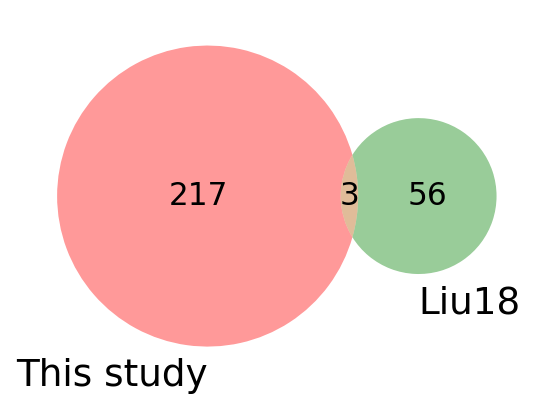

In [35]:
venn2([set(up_genes), set(hela_liu_up['Symbol'])], set_labels = ('This study', 'Liu18'))
plt.show()

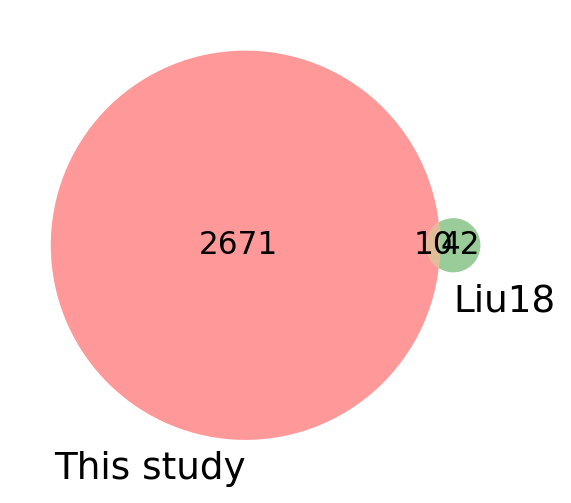

In [36]:
venn2([set(dw_genes), set(hela_liu_dw['Symbol'])], set_labels = ('This study', 'Liu18'))
plt.show()

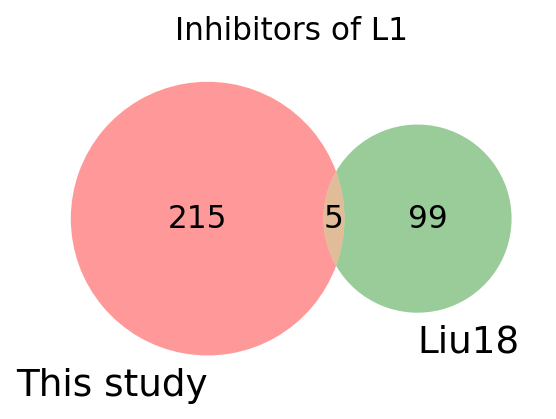

In [45]:
venn2([set(up_genes), set(liu_up)], set_labels = ('This study', 'Liu18'))
plt.title('Inhibitors of L1')
plt.show()

In [46]:
intersection(up_genes, liu_up)

['BRCA1', 'FANCB', 'KPTN', 'FANCM', 'PALB2']

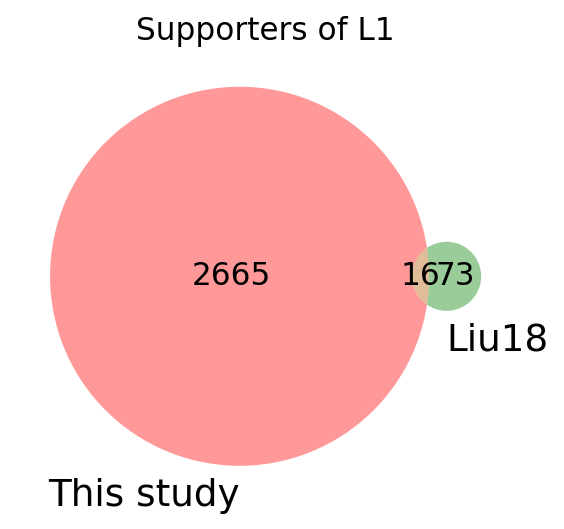

In [49]:
venn2([set(dw_genes), set(liu_dw)], set_labels = ('This study', 'Liu18'))
plt.title('Supporters of L1')
plt.show()

In [50]:
intersection(dw_genes, liu_dw)

['STK17A',
 'XRCC2',
 'XRCC6',
 'FCGR1B',
 'MRE11A',
 'RCL1',
 'SNUPN',
 'RAD50',
 'CBX1',
 'SYNCRIP',
 'HECTD1',
 'TIMM8B',
 'PABPC1',
 'ZFR',
 'FASTKD2',
 'MRPL28']